In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Election_Data.xlsx')

In [3]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [5]:
data

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [6]:
data.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
## numerical features

numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
numerical_feature

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

In [9]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique()) < 25]
discrete_feature

['economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

In [10]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
continuous_feature

['age']

In [11]:
## categorical features

categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_feature

['vote', 'gender']

In [12]:
for feature in categorical_feature:
    print("Features is {} and categories are {}".format(feature, len(data[feature].unique())))

Features is vote and categories are 2
Features is gender and categories are 2


In [13]:
cat = []
for category in categorical_feature:
        cat.append(data[category].unique())
cat

[array(['Labour', 'Conservative'], dtype=object),
 array(['female', 'male'], dtype=object)]

In [91]:
## Descriptive analysis

In [14]:
## mean

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].mean()

age                        54.182295
economic.cond.national      3.245902
economic.cond.household     3.140328
Blair                       3.334426
Hague                       2.746885
Europe                      6.728525
political.knowledge         1.542295
dtype: float64

In [15]:
## median

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].median()

age                        53.0
economic.cond.national      3.0
economic.cond.household     3.0
Blair                       4.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
dtype: float64

In [16]:
## mode

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].mode()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,37,3,3,4,2,11,2


In [17]:
## standard deviation

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].std()

age                        15.711209
economic.cond.national      0.880969
economic.cond.household     0.929951
Blair                       1.174824
Hague                       1.230703
Europe                      3.297538
political.knowledge         1.083315
dtype: float64

In [18]:
## variance

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].var()

age                        246.842075
economic.cond.national       0.776107
economic.cond.household      0.864810
Blair                        1.380212
Hague                        1.514631
Europe                      10.873759
political.knowledge          1.173571
dtype: float64

In [19]:
## skew

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [20]:
## checking for Missing values

data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [21]:
## there are no missing values in the dataset.

In [22]:
## Univariate analysis

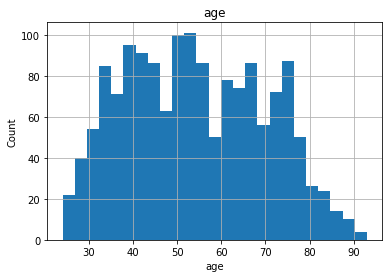

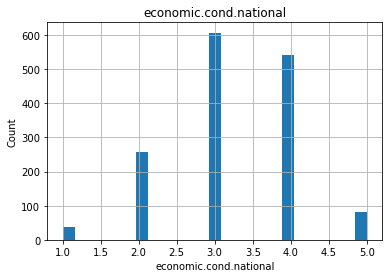

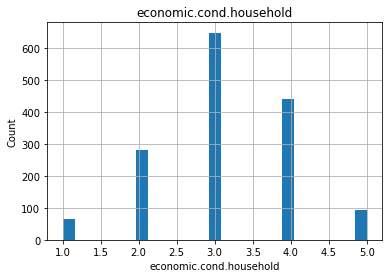

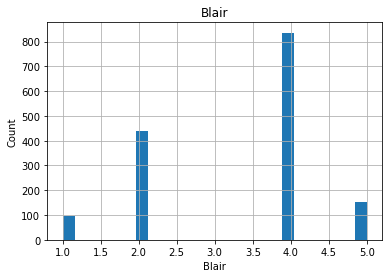

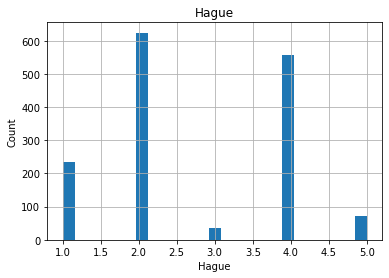

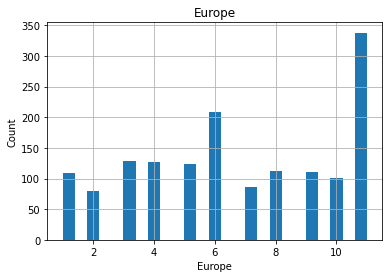

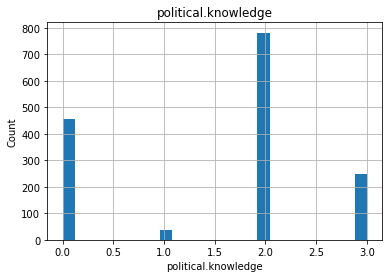

In [23]:
for feature in numerical_feature:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

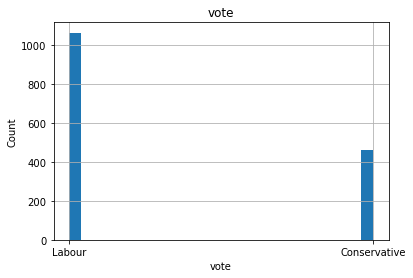

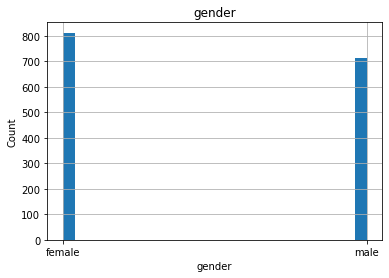

In [24]:
for feature in categorical_feature:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [25]:
## Bivariate analysis

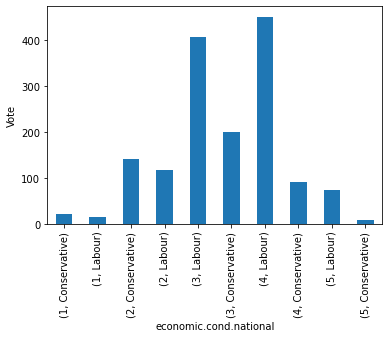

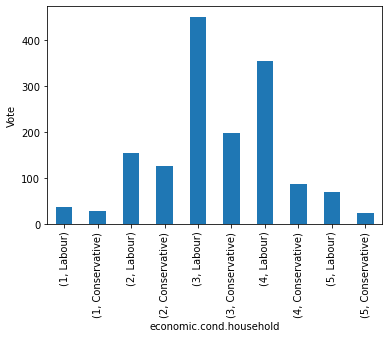

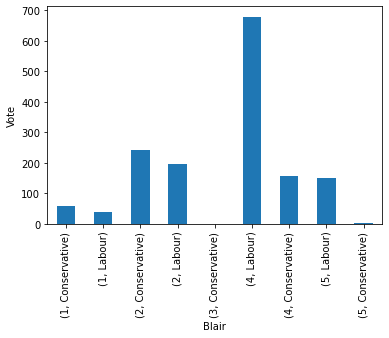

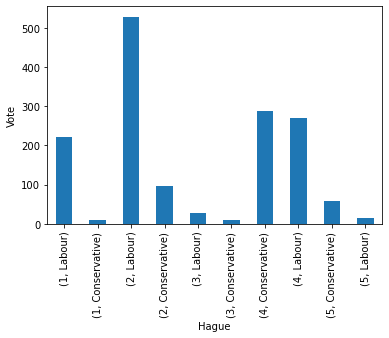

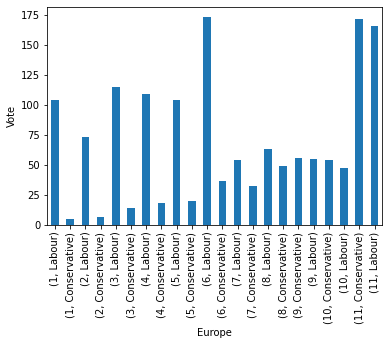

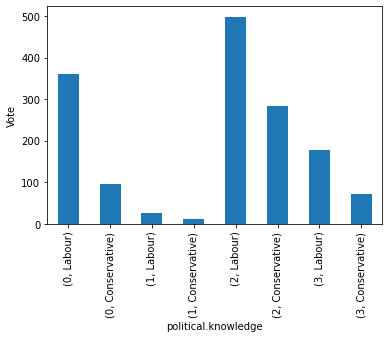

In [26]:
for feature in discrete_feature:
        dataset = data.copy()
        dataset.groupby(feature)['vote'].value_counts().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Vote')
        plt.show()

<AxesSubplot:>

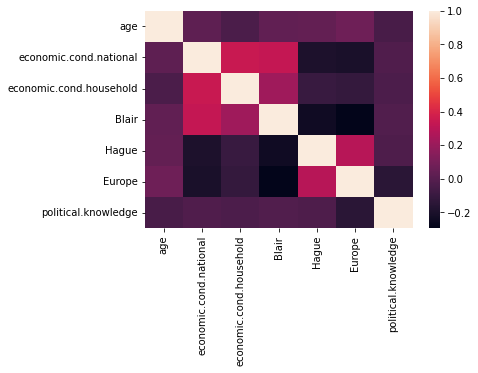

In [27]:
sns.heatmap(data.corr())

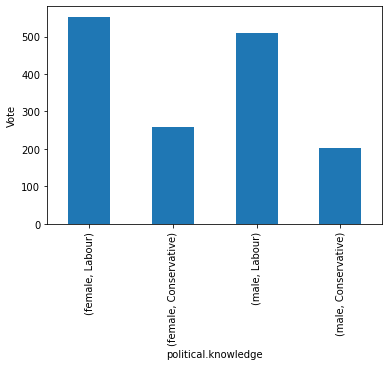

In [28]:
#for feature in categorical_feature:
dataset = data.copy()
dataset.groupby(['gender'])['vote'].value_counts().plot.bar()
plt.xlabel(feature)
plt.ylabel('Vote')
plt.show()

In [29]:
## Outliers

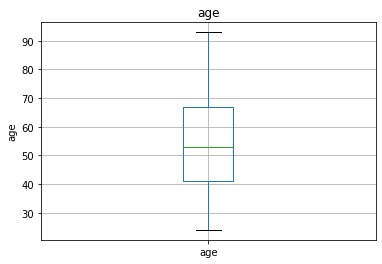

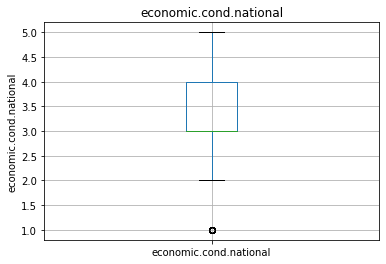

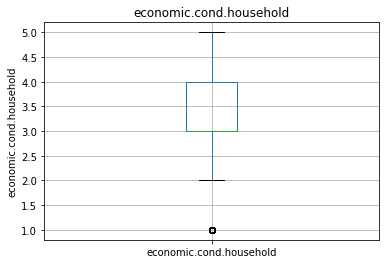

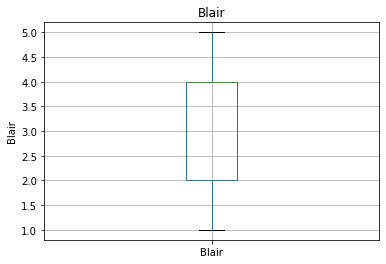

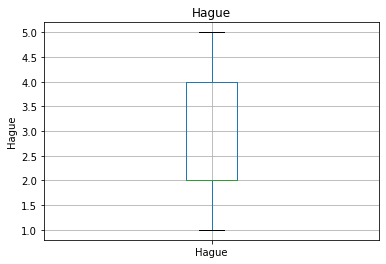

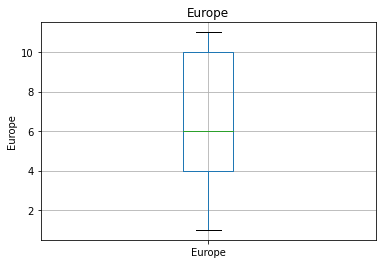

In [30]:
for feature in numerical_feature:
    if 0 in data[feature].unique():
        pass
    else:
        #df[feature]=np.log(df[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [31]:
## Data preparation

In [32]:
## Onehot encoding
obj = data[['vote', 'gender']]
num = data.drop(['vote', 'gender'], axis = 1)
encode = pd.get_dummies(obj, drop_first = True)
df = pd.concat([num, encode], axis = 1)

In [33]:
df

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1
...,...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,0,1
1521,73,2,2,4,4,8,2,0,1
1522,37,3,3,5,4,2,2,1,1
1523,61,3,3,1,4,11,2,0,1


In [34]:
## some of the features have values that is not scaled with the dependent feature. When we apply KNN modeling, scaled features are necessary as the distance between the data matters the most while choosing the clusters.

In [35]:
## Above the data has not vast differnce in scalling. And LDA, naive bayes do not need scalling of the data. We can skip the scaling part.

In [46]:
## Feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [47]:
X = df.drop(['vote_Labour'], axis = True)
y = df['vote_Labour']

In [48]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [49]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False])

In [50]:
# The selected features from the total features

selected_feature = X.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feature)))

total features: 8
selected features: 7


In [51]:
selected_feature

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

In [52]:
X = X[selected_feature]

In [36]:
## Splitting the data

In [53]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [115]:
X_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
1296,56,4,3,4,2,6,0
196,54,3,5,2,4,11,2
1146,41,4,3,4,2,6,2
1349,72,3,2,2,4,7,2
81,43,2,4,2,4,5,0
...,...,...,...,...,...,...,...
1130,74,4,4,4,4,7,0
1294,31,4,4,4,2,4,2
860,43,3,4,2,4,11,2
1459,72,3,5,5,2,1,0


In [116]:
X_test

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
782,35,4,4,5,2,6,2
76,42,4,3,4,2,4,2
1009,32,4,3,4,2,4,1
1403,48,3,3,2,4,2,2
846,35,3,4,2,1,11,2
...,...,...,...,...,...,...,...
506,72,4,3,4,4,6,2
1173,32,4,4,2,2,11,0
1321,49,3,2,4,4,9,2
722,35,4,4,4,2,6,2


In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [119]:
y_pred=model.predict(X_test)

In [120]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 52,  37],
       [ 20, 196]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

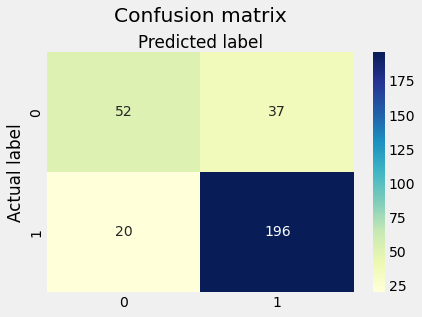

In [121]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [122]:
y_train_predict=model.predict(X_train)
Logistic_model_score=model.score(X_train,y_train)
print(metrics.classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       373
           1       0.87      0.91      0.89       847

    accuracy                           0.84      1220
   macro avg       0.82      0.80      0.81      1220
weighted avg       0.84      0.84      0.84      1220



In [123]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.58      0.65        89
           1       0.84      0.91      0.87       216

    accuracy                           0.81       305
   macro avg       0.78      0.75      0.76       305
weighted avg       0.81      0.81      0.81       305



In [124]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

AUC: 0.894


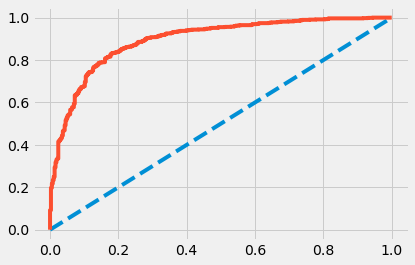

In [125]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.865


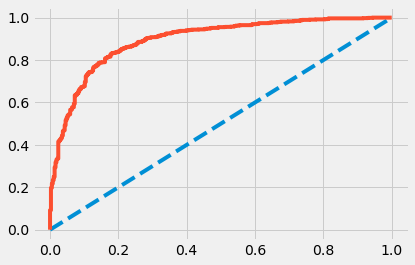

In [126]:
probs_test = model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [127]:
## LDA

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [129]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [130]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8442622950819673
[[264 109]
 [ 81 766]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       373
           1       0.88      0.90      0.89       847

    accuracy                           0.84      1220
   macro avg       0.82      0.81      0.81      1220
weighted avg       0.84      0.84      0.84      1220



the auc 0.894 


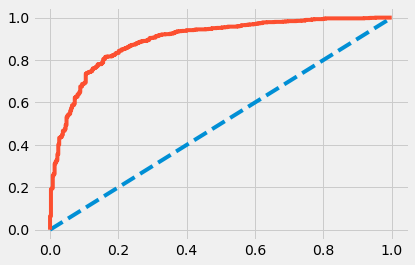

In [131]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [132]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print(LDA_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8098360655737705
[[ 53  36]
 [ 22 194]]
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        89
           1       0.84      0.90      0.87       216

    accuracy                           0.81       305
   macro avg       0.78      0.75      0.76       305
weighted avg       0.80      0.81      0.80       305



the auc curve 0.866 


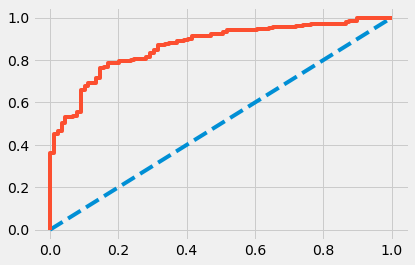

In [133]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [134]:
## Naive bayes

In [135]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [136]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [137]:
Y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)

print(model_score)
print(metrics.confusion_matrix(y_train,Y_train_predict))
print(metrics.classification_report(y_train,Y_train_predict))

0.8377049180327869
[[271 102]
 [ 96 751]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       373
           1       0.88      0.89      0.88       847

    accuracy                           0.84      1220
   macro avg       0.81      0.81      0.81      1220
weighted avg       0.84      0.84      0.84      1220



the auc 0.892 


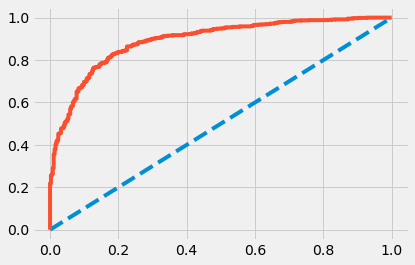

In [138]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [139]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)

print(model_score)
print(metrics.confusion_matrix(y_test,Y_test_predict))
print(metrics.classification_report(y_test,Y_test_predict))

0.8065573770491803
[[ 55  34]
 [ 25 191]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        89
           1       0.85      0.88      0.87       216

    accuracy                           0.81       305
   macro avg       0.77      0.75      0.76       305
weighted avg       0.80      0.81      0.80       305



the auc curve 0.855 


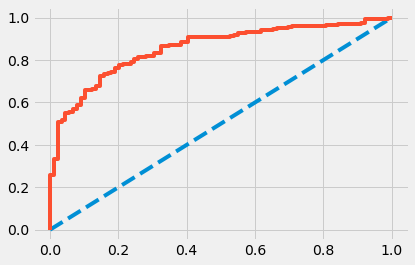

In [140]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [141]:
## KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores=knn.score(X_test,y_test)
    print('Neighbours:',k,'; Accuracy:',scores)

Neighbours: 1 ; Accuracy: 0.7475409836065574
Neighbours: 3 ; Accuracy: 0.760655737704918
Neighbours: 5 ; Accuracy: 0.7508196721311475
Neighbours: 7 ; Accuracy: 0.7573770491803279
Neighbours: 9 ; Accuracy: 0.760655737704918
Neighbours: 11 ; Accuracy: 0.760655737704918
Neighbours: 13 ; Accuracy: 0.7573770491803279
Neighbours: 15 ; Accuracy: 0.7770491803278688
Neighbours: 17 ; Accuracy: 0.7868852459016393
Neighbours: 19 ; Accuracy: 0.7868852459016393


In [144]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

y_train_predict = KNN_model.predict(X_train)
KNN_model_score = KNN_model.score(X_train,y_train)

print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8565573770491803
[[270 103]
 [ 72 775]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76       373
           1       0.88      0.91      0.90       847

    accuracy                           0.86      1220
   macro avg       0.84      0.82      0.83      1220
weighted avg       0.85      0.86      0.85      1220



the auc 0.923 


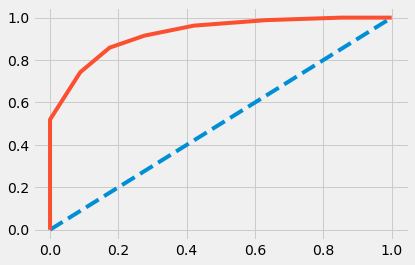

In [145]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [146]:
y_test_predict=KNN_model.predict(X_test)

KNN_model_score=KNN_model.score(X_test, y_test)

print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.7573770491803279
[[ 50  39]
 [ 35 181]]
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        89
           1       0.82      0.84      0.83       216

    accuracy                           0.76       305
   macro avg       0.71      0.70      0.70       305
weighted avg       0.75      0.76      0.76       305



the auc curve 0.818 


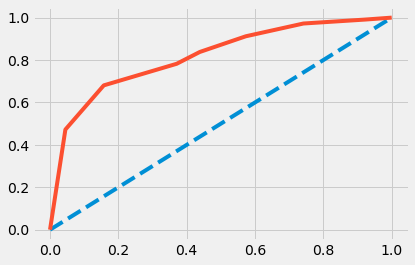

In [147]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [148]:
## Model tuning

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100]}
lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid=grid_values, scoring="accuracy", cv=2)
clf.fit(X_train, y_train)
clf.best_estimator_

C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the fo

LogisticRegression(C=0.1)

In [151]:
y_pred1=clf.predict(X_test)

In [152]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix

array([[ 52,  37],
       [ 20, 196]], dtype=int64)

In [153]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.58      0.65        89
           1       0.84      0.91      0.87       216

    accuracy                           0.81       305
   macro avg       0.78      0.75      0.76       305
weighted avg       0.81      0.81      0.81       305



In [154]:
## Bagging Random Forest

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor, RandomForestClassifier, GradientBoostingRegressor

In [156]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [157]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
#predictions=predictions.reshape(3814, 1)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 21.86 degrees.


In [158]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7967213114754098


In [159]:
## variable importances

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda X: X[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.22
Variable: Europe               Importance: 0.2
Variable: Hague                Importance: 0.18
Variable: Blair                Importance: 0.14
Variable: political.knowledge  Importance: 0.1
Variable: economic.cond.national Importance: 0.08
Variable: economic.cond.household Importance: 0.07


Text(0.5, 1.0, 'Variable Importances')

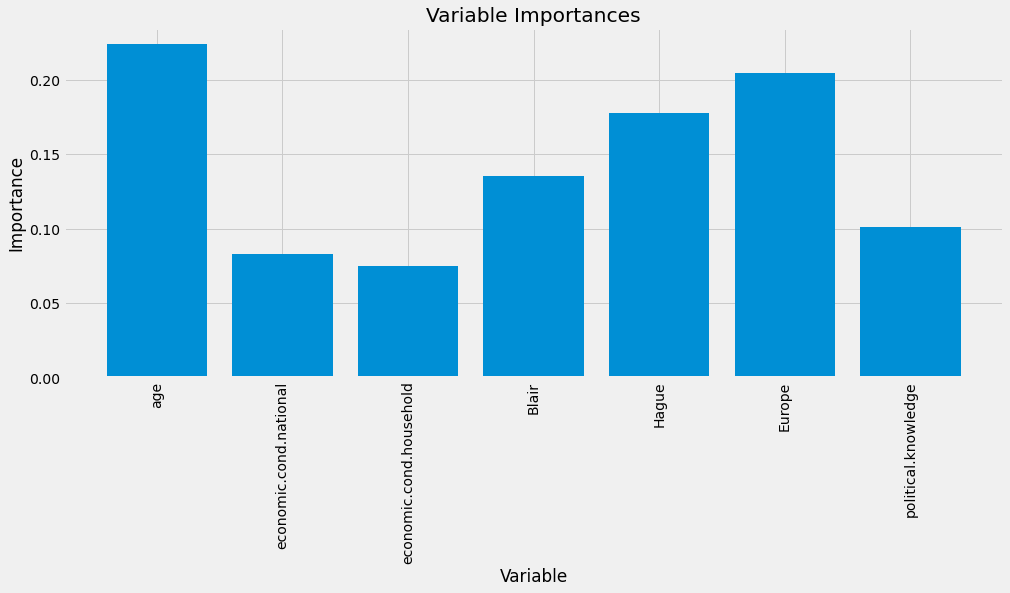

In [160]:
## Visualizations

plt.figure(figsize = (15,6))

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable')
plt.title('Variable Importances')

In [161]:
## random forest

In [162]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rf, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
350 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\D

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [163]:
print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 10, 'max_features': 1}
0.8434426229508197


In [164]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [165]:
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 10}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1000}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 100}

# 3 separate models
model_1 = DecisionTreeClassifier(**params_1)
model_2 = DecisionTreeClassifier(**params_2)
model_3 = DecisionTreeClassifier(**params_3)

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

# 3 separate prediction sets
preds_1 = model_1.predict(X_test)
preds_2 = model_3.predict(X_test)
preds_3 = model_2.predict(X_test)

print(f'Accuracy on Model 1 = {round(accuracy_score(y_test, preds_1), 5)}')
print(f'Accuracy on Model 2 = {round(accuracy_score(y_test, preds_2), 5)}')
print(f'Accuracy on Model 3 = {round(accuracy_score(y_test, preds_3), 5)}')


Accuracy on Model 1 = 0.8
Accuracy on Model 2 = 0.74098
Accuracy on Model 3 = 0.76066


In [166]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)
Bagging_model.fit(X_train,y_train)
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,y_train)
print(Bagging_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9983606557377049
[[371   2]
 [  0 847]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       373
           1       1.00      1.00      1.00       847

    accuracy                           1.00      1220
   macro avg       1.00      1.00      1.00      1220
weighted avg       1.00      1.00      1.00      1220



AUC: 1.000


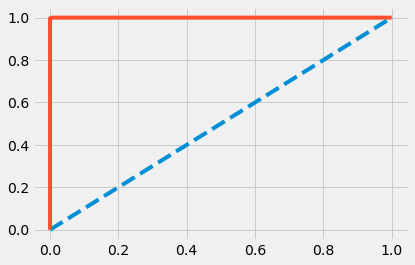

In [167]:
probs = Bagging_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [168]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,y_test)
print(Bagging_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8229508196721311
[[ 55  34]
 [ 20 196]]
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        89
           1       0.85      0.91      0.88       216

    accuracy                           0.82       305
   macro avg       0.79      0.76      0.77       305
weighted avg       0.82      0.82      0.82       305



AUC: 0.844


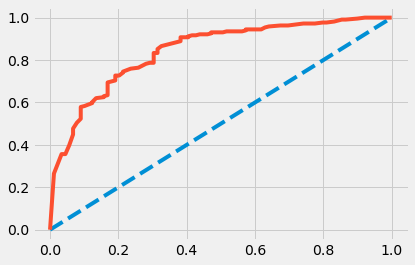

In [169]:
probs_test = Bagging_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr)

In [170]:
from xgboost import XGBClassifier
XGB_model=XGBClassifier(n_estimators=100,random_state=1)
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [171]:
y_train_predict=XGB_model.predict(X_train)
XGB_model_score=XGB_model.score(X_train,y_train)
print(XGB_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9868852459016394
[[364   9]
 [  7 840]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       373
           1       0.99      0.99      0.99       847

    accuracy                           0.99      1220
   macro avg       0.99      0.98      0.98      1220
weighted avg       0.99      0.99      0.99      1220



AUC: 0.999


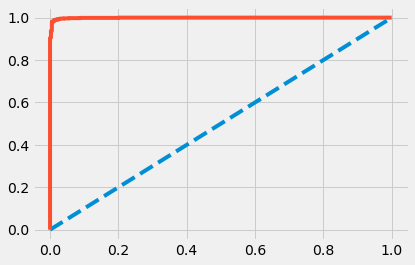

In [172]:
probs = XGB_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [173]:
y_test_predict = XGB_model.predict(X_test)
XGB_model_score = XGB_model.score(X_test, y_test)
print(XGB_model_score)
print(metrics.confusion_matrix(y_test, Y_test_predict))
print(metrics.classification_report(y_test, Y_test_predict))

0.7967213114754098
[[ 55  34]
 [ 25 191]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        89
           1       0.85      0.88      0.87       216

    accuracy                           0.81       305
   macro avg       0.77      0.75      0.76       305
weighted avg       0.80      0.81      0.80       305



AUC: 0.844


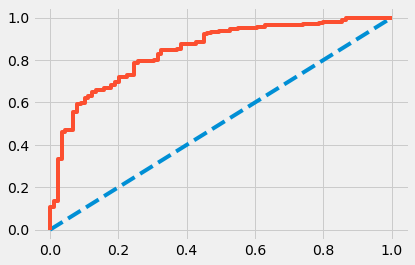

In [174]:
probs_test = XGB_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr)

In [175]:
import pickle

In [176]:
# open a file, where you ant to store the data
file = open('baggingclassifier.pkl', 'wb')

# dump information to that file
pickle.dump(Bagging_model, file)

In [192]:
## Question 2

In [195]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhrup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhrup\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\dhrup\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [194]:
pip install wordcloud

In [196]:
Rc = inaugural.raw('1941-Roosevelt.txt')
Kc = inaugural.raw('1961-Kennedy.txt')
Nc = inaugural.raw('1973-Nixon.txt')

print('Character counts for the mentioned documents')
len(Rc),len(Kc),len(Nc)

Character counts for the mentioned documents


(7571, 7618, 9991)

In [197]:
Rw = inaugural.words('1941-Roosevelt.txt')
Kw = inaugural.words('1961-Kennedy.txt')
Nw = inaugural.words('1973-Nixon.txt')

print('Words counts for the mentioned documents')
len(Rw),len(Kw),len(Nw)

Words counts for the mentioned documents


(1536, 1546, 2028)

In [198]:
Rs = inaugural.sents('1941-Roosevelt.txt')
Ks = inaugural.sents('1961-Kennedy.txt')
Ns = inaugural.sents('1973-Nixon.txt')

print('Sentences counts for the mentioned documents')
len(Rs),len(Ks),len(Ns)

Sentences counts for the mentioned documents


(68, 52, 69)

In [200]:
def remove_stopwords(array,stopw):
    filtered = []
    for w in array:
        wl = w.lower()  
        if wl not in stopw and w!='--':  
            filtered.append(wl)    
    return filtered
  
stopw = set(stopwords.words('english')+list(string.punctuation))
Rfw = remove_stopwords(Rw,stopw)
Kfw = remove_stopwords(Kw,stopw)
Nfw = remove_stopwords(Nw,stopw)

In [201]:
def top3words(array):
    Ctr = Counter(array) 
    most_occur = Ctr.most_common(3) 
    return most_occur

print('Top 3 words for Roosevelt:',top3words(Rfw))
print('Top 3 words for Kennedy:',top3words(Kfw))
print('Top 3 words for Nixon:',top3words(Nfw)) 

Top 3 words for Roosevelt: [('nation', 12), ('know', 10), ('spirit', 9)]
Top 3 words for Kennedy: [('let', 16), ('us', 12), ('world', 8)]
Top 3 words for Nixon: [('us', 26), ('let', 22), ('america', 21)]


In [202]:
def word_cloud(w):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(w) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

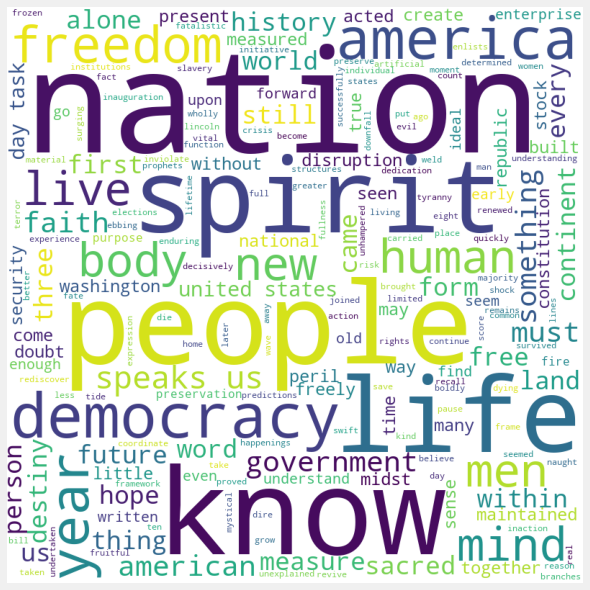

In [203]:
# For Roosevelt
word_cloud((" ").join(Rfw))

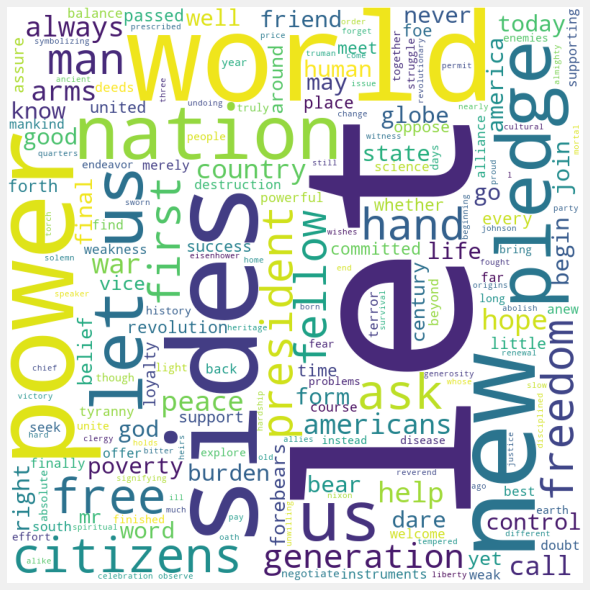

In [204]:
# For Kennedy
word_cloud((" ").join(Kfw))

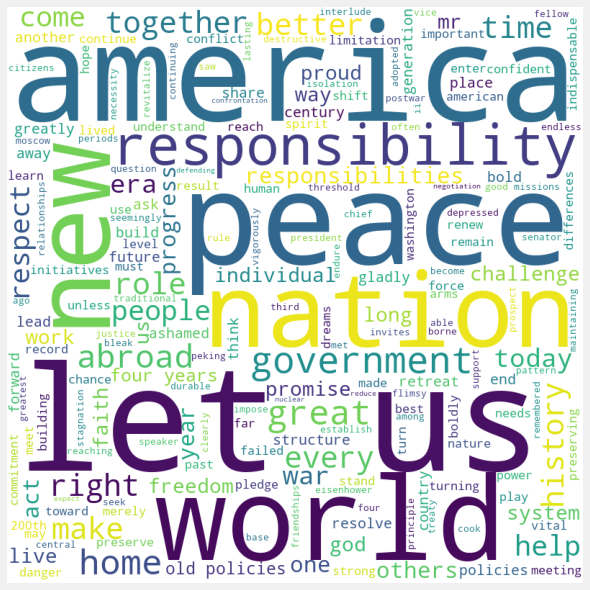

In [205]:
# For Nixon
word_cloud((" ").join(Nfw))